### Binär klassificering ska göras med hjälp av Support Vector Machines

In [239]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score




In [240]:
data_df = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/random_data.csv")
data_df_2 = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/random_data_2.csv")
data_df_3 = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/random_data_3.csv")
data_df_3_d = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/random_data_3d.csv")

In [241]:
data_df.head()

,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [242]:
data_df_2.head()

,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [243]:
data_df_3.head()

,Unnamed: 0,feature_1,feature_2,target
0,0,0.811586,1.977330,1
1,1,-0.283428,NaN,0
2,2,-0.281272,0.858368,1
3,3,0.617176,1.293528,1
4,4,1.080526,0.815136,1


## Data analys 

datasets de första två  innehåller 1000 datapunkter och 3 attributer
men den sista innehåller samma antal datapunkter men 4 attributer

### Saknas värden?

Det sakans inte värden på första två dataset men random_data_3 skanas värden i den datasetet.

In [244]:
print(f'***Randomdata***\n{data_df.isna().sum()}')
print(f'***Randomdata_2***\n{data_df_2.isna().sum()}')
print(f'***Randomdata_3***\n{data_df_3.isna().sum()}')

***Randomdata***
feature_1    0
feature_2    0
target       0
dtype: int64
***Randomdata_2***
feature_1    0
feature_2    0
target       0
dtype: int64
***Randomdata_3***
Unnamed: 0     0
feature_1     50
feature_2     49
target         0
dtype: int64


### Finns dubbletter?

Ja det finns dubbletter i random_data_2 dataset genom funtion som heter duplicated som visar oss genom att skriva ut antigen False eller TRUE så och true betyder att det finns dubbletter, för i de andra dataset visades bara false.

In [245]:
print(f'***Randomdata***\n{data_df.duplicated().value_counts()}')
print(f'***Randomdata_2***\n{data_df_2.duplicated().value_counts()}')
print(f'***Randomdata_3***\n{data_df_3.duplicated().value_counts()}')





***Randomdata***
False    1000
dtype: int64
***Randomdata_2***
False    500
True     500
dtype: int64
***Randomdata_3***
False    1000
dtype: int64


## Skapa träning/test data 
Target:target

### Finns extremvärden?

Nej det finns inte som ni ser på visualiseringen nedan för varje dataset att det inte finns värde som sticker ut från de övriga de ser ganska ihopslagna ut. annars bör finnas några som sticker ut för att det ska finnas extremtvärde.

In [246]:
X=data_df.drop(columns=['target'])
Y=data_df.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2,random_state=42)

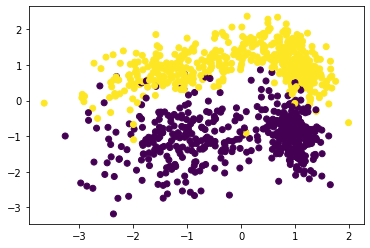

In [247]:

plt.scatter(data_df['feature_1'],data_df['feature_2'],c=Y)
plt.show()

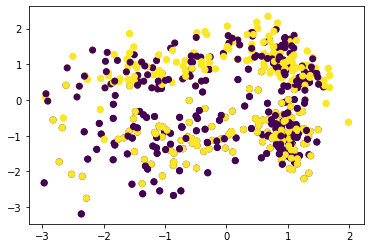

In [248]:

plt.scatter(data_df_2['feature_1'],data_df_2['feature_2'],c=Y)
plt.show()


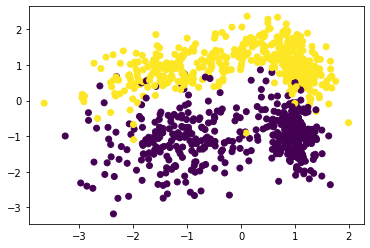

In [249]:
plt.scatter(data_df_3['feature_1'],data_df_3['feature_2'], c=Y)
plt.show()


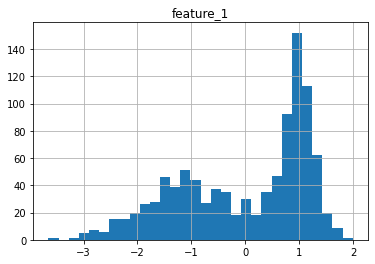

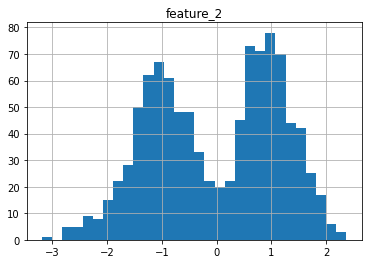

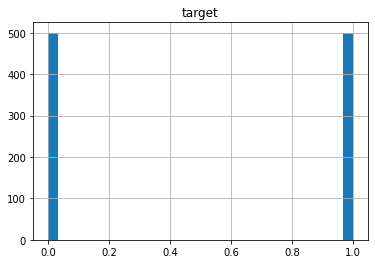

In [250]:
fethchar_list=[['feature_1'],['feature_2'],['target']]


for x in fethchar_list:
    data_df[x].hist(bins=30)

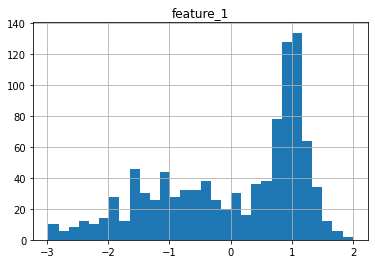

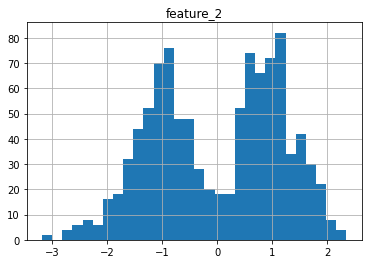

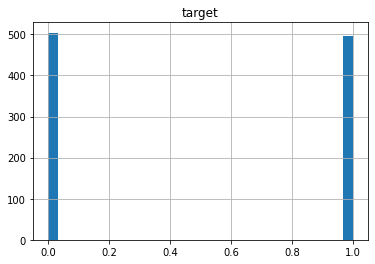

In [251]:
fethchar_list=[['feature_1'],['feature_2'],['target']]


for x in fethchar_list:
    data_df_2[x].hist(bins=30)

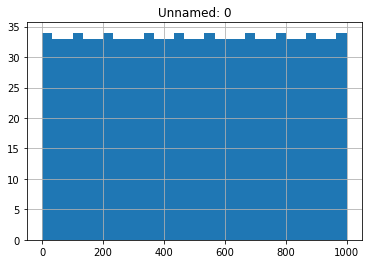

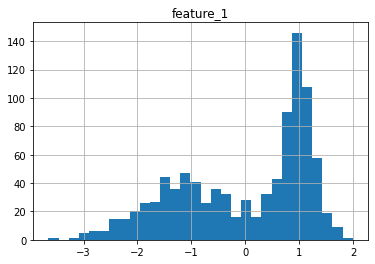

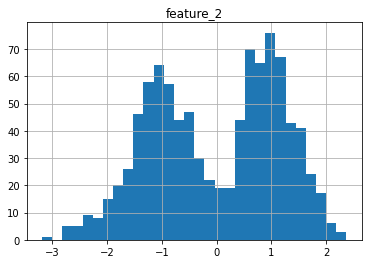

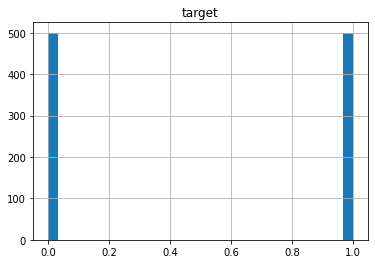

In [252]:
fethchar_list=[['Unnamed: 0'],['feature_1'],['feature_2'],['target']]


for x in fethchar_list:
    data_df_3[x].hist(bins=30)

### Annat?

Jag tycker att man bör ta bort kolumen Unnamed från ranndomddata_3 för den är onöding och den kolumnen som är onödig kan göra data sämre.

### Välja Dataset

Efter jag har Analyserat de tre olika dataseten så nu är det dags att välja datan som jag anser att den har har bäst kvalitet.
och den är random_data den första alltså.

### Ritar ut all data med olika färger

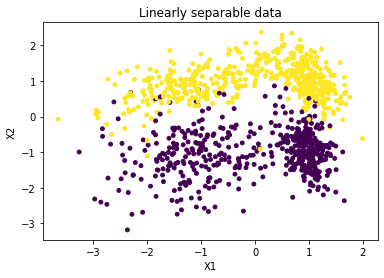

In [253]:
plt.scatter(data_df['feature_1'],data_df['feature_2'],c=Y, s = 15)
# plt.scatter(s_v_m.support_vectors_,s_v_m.support_vectors_, color='red')
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()


### Träning en Support Vector Machine modell 

###  Vad får modellen för testscore?

#### Ser det ut som att det är möjligt att skapa en bra klassificering?

In [254]:

kernel_lista=['linear','sigmoid','poly','rbf']

for k in kernel_lista:
    print(f'Kernel typen är nu ***{k}***')
    s_v_m = svm.SVC(kernel=k)
    s_v_m.fit(x_train,y_train)
    test= s_v_m.score(x_test,y_test)
    print(f'Testsocre är {test}')


Kernel typen är nu ***linear***
Testsocre är 0.985
Kernel typen är nu ***sigmoid***
Testsocre är 0.95
Kernel typen är nu ***poly***
Testsocre är 0.98
Kernel typen är nu ***rbf***
Testsocre är 0.995


Som vi ser att datapunkter ligger ganska mycket nära varandra klassificering är mjöligt men att det är bra kommer att blir lite svårt med tanke att det är för många som placeras väldigt nära varandra.

### Ritar åter ut datan, men med hyperplanet för din SVM




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


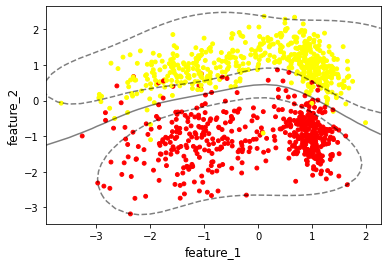

In [255]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, s=15, cmap='autumn')
plt.xlabel(X.iloc[:,0].name, fontsize=12)
plt.ylabel(X.iloc[:,1].name, fontsize=12)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = s_v_m.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# ax.scatter(s_v_m.support_vectors_[:, 0], s_v_m.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='green', edgecolors='blue')
plt.show()

### Ritar ut hyperplanet med testdata

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


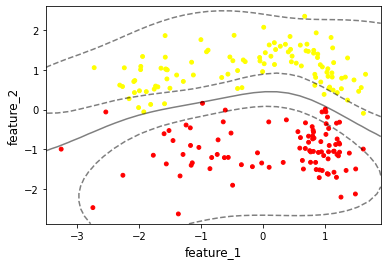

In [256]:
ax = plt.gca()
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, s=15, cmap='autumn')
plt.xlabel(X.iloc[:,0].name, fontsize=12)
plt.ylabel(X.iloc[:,1].name, fontsize=12)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = s_v_m.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# ax.scatter(s_v_m.support_vectors_[:, 0], s_v_m.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='green', edgecolors='blue')
plt.show()

# Väl Godkänt:

In [257]:
data_df_3_d.head()

,feature_1,feature_2,feature_3,target
0,1.126445,0.978839,-0.618271,1
1,0.312105,1.098053,-0.639979,1
2,-0.820462,-0.402507,-1.084069,0
3,-1.133805,0.688333,-1.082364,0
4,1.129562,0.267780,-1.086351,1


## Data analys 

dataset  innehåller 1000 datapunkter och 4 attributer

## Saknas värden?

Nej det sakans inte värden på denna dataseten

In [258]:
print(f'***Randomdata_3D_***\n{data_df_3_d.isna().sum()}')

***Randomdata_3D_***
feature_1    0
feature_2    0
feature_3    0
target       0
dtype: int64


## Finns dubbletter?

In [259]:
print(f'***Randomdata_3D_***\n{data_df_3_d.duplicated().value_counts()}')

***Randomdata_3D_***
False    1000
dtype: int64


## Finns extremvärden?

Nej det finns inte som ni ser på visualiseringen nedan för varje dataset att det inte finns värde som sticker ut från de övriga de ser ganska ihopslagna ut.

## Ritar ut all data (med klasserna i olika färger)

/var/folders/9b/zy02qcpn7vz1c_1nt6dn80sw0000gn/T/ipykernel_16135/3904570933.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


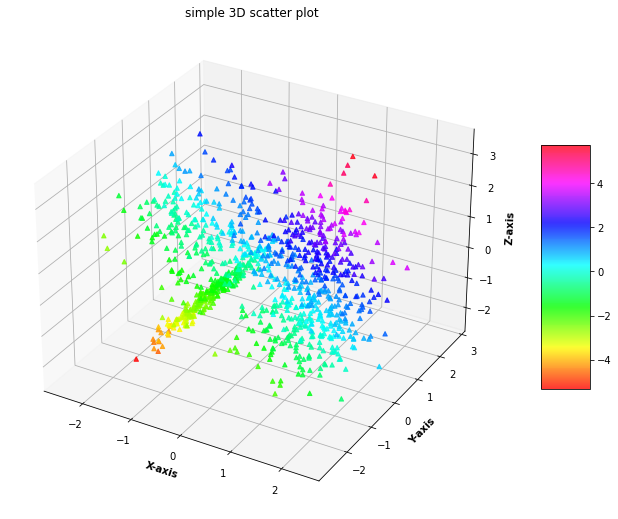

In [260]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(data_df_3_d['feature_1'],data_df_3_d['feature_2'],data_df_3_d['feature_3'],
                    alpha = 0.8,
                    c = (data_df_3_d['feature_1']+data_df_3_d['feature_2']+data_df_3_d['feature_3']),
                    cmap = my_cmap,
                    marker ='^')


 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')


fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

## Skapa träning/test data 
Target:target

In [261]:
x_3d=data_df_3_d.drop(columns=['target'])
y_3d=data_df_3_d.target



x_train_3d, x_test_3d, y_train_3d, y_test_3d = sklearn.model_selection.train_test_split(x_3d,y_3d,test_size=0.2,random_state=42)


### Träning en Support Vector Machine modell 

###  Vad får modellen för testscore?

In [262]:

kernel_lista=['linear','sigmoid','poly','rbf']

for k in kernel_lista:
    print(f'Kernel typen är nu ***{k}***')
    s_v_m_3d= svm.SVC(kernel=k)
    s_v_m_3d.fit(x_train_3d,y_train_3d)
    y_pred = s_v_m_3d.predict(x_test_3d)
    accuracy = accuracy_score(y_test_3d, y_pred)
    print(f'Test Score: {accuracy}')



Kernel typen är nu ***linear***
Test Score: 0.975
Kernel typen är nu ***sigmoid***
Test Score: 0.92
Kernel typen är nu ***poly***
Test Score: 0.97
Kernel typen är nu ***rbf***
Test Score: 0.98


plotta 3 dimensioner används ganska ofta i datavisualiseringsprojekt eftersom de kan förmedla information, vanligtvis någon typ av jämförelse, på ett enkelt och intuitivt sätt. Det fina med 3D-stapeldiagram är att de bibehåller enkelheten hos 2D-staplott samtidigt som de utökar sin kapacitet att representera jämförande information.

Varje stapel i en barplot behöver alltid 2 saker: en position och en storlek. Med 3D-stapeldiagram kommer vi att tillhandahålla den informationen för alla tre variablerna x, y, z .

Jag väljer z- axeln för att koda höjden på varje stapel; därför kommer varje stapel att börja på z = 0 och ha en storlek som är proportionell mot värdet vi försöker visualisera. X- och y- positionerna kommer att representera koordinaterna för stapeln över 2D-planet av z = 0. Jag ställer in x- och y - storleken för varje stapel till ett värde av 1 så att alla staplar har samma form.

### Rita åter ut datan, men med hyperplanet för din SVM
### Rita ut hyperplanet med testdata

/var/folders/9b/zy02qcpn7vz1c_1nt6dn80sw0000gn/T/ipykernel_16135/235777293.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


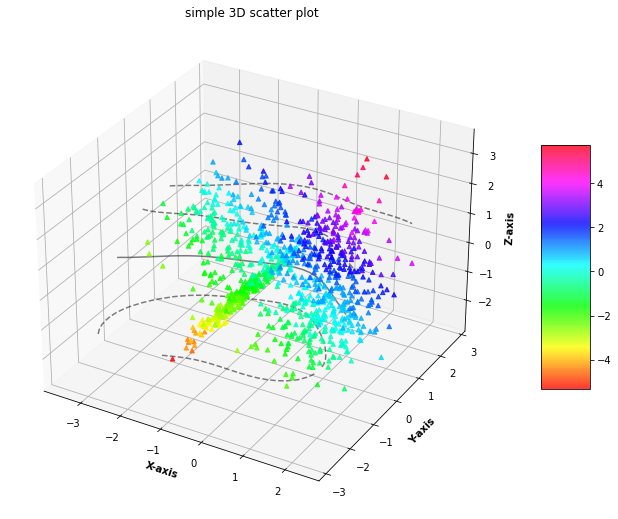

In [263]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = s_v_m.decision_function(xy).reshape(XX.shape)

 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(data_df_3_d['feature_1'],data_df_3_d['feature_2'],data_df_3_d['feature_3'],
                    alpha = 0.8,
                    c = (data_df_3_d['feature_1']+data_df_3_d['feature_2']+data_df_3_d['feature_3']),
                    cmap = my_cmap,
                    marker ='^')


 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

/var/folders/9b/zy02qcpn7vz1c_1nt6dn80sw0000gn/T/ipykernel_16135/115011661.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


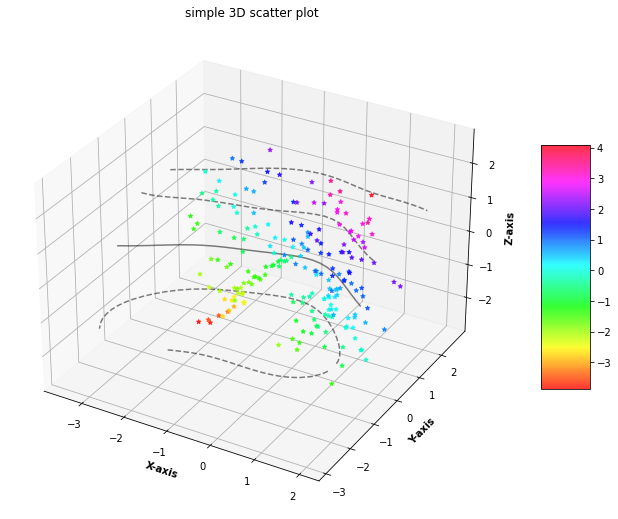

In [264]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = s_v_m.decision_function(xy).reshape(XX.shape)

 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 # Creating plot
sctt = ax.scatter3D(x_test_3d['feature_1'],x_test_3d['feature_2'],x_test_3d['feature_3'],
                    alpha = 0.8,
                    c = (x_test_3d['feature_1']+x_test_3d['feature_2']+x_test_3d['feature_3']),
                    cmap = my_cmap,
                    marker ='*') 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()